# Project - Predictive Customer Segmentation

## Boosting Sales With Machine Learning


---

## The problem 
The sales cycle for enterprise contract is extremely long (avg 13-18 months), and because of the complexity of the service and solution the company provides, it's important to identify potential buyer early in the sales/marketing funnel. 

Prioritizing new leads is critical for any sales or marketing team. Often time Sales Development Representatives spend most of their time going through prospects, trying to identify which ones to contact.

This projcet uses machine learning methods from historical data and state of the art classifiers to learn the relationship between sales account features and conversion outcome, enabling us to predict which leads are likely to convert.

## Research objectives
Make sales process more effective by training a machine learning algorithm to predict the quality of our leads based upon their demographic descriptions and activities.

## Data set

**27 months customer data from a tech company in SF**


### Metrics

- Size: ~200k records

- Demographic data: title, industry, company, revenue, size

- Purchase data: total retail purchase amount

- Activity data: current status, channel/content acquired, qualify reason, disqualify reason, conversion content.


Problem: t

Goal: identify attributes that influences buy and pass the correct information to the sales team.


Question: whether this contact is a sales qualified lead.
Secondary question: What make a person going through the marketing funnel faster- channels?content?

## Assumption

There're some attributes of a contact that influence the likeness of buy and there's a way for businesses to rank prospects against a scale that represents the perceived value each lead represents to the organization. The resulting score is used to determine which leads a receiving function (e.g. sales, partners, teleprospecting) will engage, in order of priority.


## Data wrangling

In [364]:
import csv
from collections import namedtuple

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
% matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [366]:
import pandas as pd
ds2 = pd.read_csv('./contacts.csv', index_col=0, encoding='latin-1')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [367]:
ds2.shape #Understand how many variables and records are in the data set

(212080, 28)

In [368]:
ds2.columns #discover the columns in the data set

Index(['Email', 'First Name', 'Last Name', 'B2B customer?', 'B2C Customer?',
       'Total Device Count', 'Owner ID', 'Job Title',
       'Became a Marketing Qualified Lead Date', 'Create Date',
       'HubSpot Score', 'Company Name', 'Website URL', 'Annual Revenue',
       'Industry', 'Emails Opened', 'Original Source Type',
       'Recent Conversion', 'Lead Source - Most Recent',
       'Lead Source Detail - Most Recent', 'MQL Reason Code', 'Status',
       'Recycled Reason Code', 'Employees', 'IV Revenue',
       'Most Recent Recycle Date', 'Wholesale Products Purchased',
       'Products Purchased'],
      dtype='object')

In [369]:
# Use the .rename() method to rename columns
ds2.rename(columns={'First Name':'firstname','Last Name':'lastname','B2B customer?': 'isB2B'}, inplace=True)

In [370]:
ds2.rename(columns={'B2C Customer?':'isB2C','Total Device Count':'total_no_device','Owner ID': 'contact_owner'}, inplace=True)

In [371]:
ds2.rename(columns={'Job Title':'title','Became a Marketing Qualified Lead Date':'first_MQL_date','Create Date': 'create_date'}, inplace=True)

In [372]:
ds2.rename(columns={'HubSpot Score':'hubspot_score','Annual Revenue':'revenue','Original Source Type': 'channel'}, inplace=True)

In [373]:
ds2.rename(columns={'Recent Conversion':'last_conversion','Lead Source - Most Recent':'lead_source_most_recent','MQL Reason Code': 'MQL_reason'}, inplace=True)

In [374]:
ds2.rename(columns={'Recycled Reason Code':'recycle_reason','IV Revenue':'IVrevenue','Most Recent Recycle Date': 'recycle_most_recent_date'}, inplace=True)

In [375]:
ds2.rename(columns={'Wholesale Products Purchased':'wholesale_purchase','Products Purchased':'retail_purchase'}, inplace=True)

In [376]:
ds2.head() #frist 5 rows in the data set

,Email,firstname,lastname,isB2B,isB2C,total_no_device,contact_owner,title,first_MQL_date,create_date,...,lead_source_most_recent,Lead Source Detail - Most Recent,MQL_reason,Status,recycle_reason,Employees,IVrevenue,recycle_most_recent_date,wholesale_purchase,retail_purchase
Contact ID,,,,,,,,,,,,,,,,,,,,,
1,bh@hubspot.com,Brian,Halligan (Sample Contact),NaN,NaN,NaN,Nathan Wang,CEO,NaN,1/17/17 18:23,...,NaN,NaN,NaN,Known,NaN,2283.0,408000000.0,NaN,NaN,NaN
2051,jcamenzind@co.pacific.wa.us,Joe,Camenzind,NaN,Yes,2.0,Ziran Wang,NaN,NaN,1/23/17 15:00,...,B2C Store,NaN,NaN,Known,NaN,4309.0,NaN,NaN,NaN,NaN
8451,hello@getfishbit.com,NaN,[[unknown]],NaN,NaN,1306.0,Recycle,NaN,6/6/17 9:07,1/18/17 11:16,...,Developer Community,NaN,NaN,Recycled,Self-Service,NaN,NaN,NaN,NaN,NaN
6151,antonio@stattus4.com,Antonio Carlos,Oliveira Junior,Yes,Yes,28.0,Nathan Wang,NaN,5/2/17 10:19,1/18/17 11:04,...,B2B Store,NaN,NaN,Known,NaN,NaN,NaN,NaN,NaN,RedBear Duo (Wi-Fi + BLE) - RedBear Duo with h...
8201,profbayer@gmail.com,DJ,Bayer,NaN,Yes,2.0,Nathan Wang,NaN,NaN,1/27/17 8:16,...,B2C Store,NaN,NaN,Known,NaN,6.0,253000.0,NaN,NaN,Particle Pi Starter Kit with Raspberry Pi 3


In [377]:
ds2.columns ##the updated column names

Index(['Email', 'firstname', 'lastname', 'isB2B', 'isB2C', 'total_no_device',
       'contact_owner', 'title', 'first_MQL_date', 'create_date',
       'hubspot_score', 'Company Name', 'Website URL', 'revenue', 'Industry',
       'Emails Opened', 'channel', 'last_conversion',
       'lead_source_most_recent', 'Lead Source Detail - Most Recent',
       'MQL_reason', 'Status', 'recycle_reason', 'Employees', 'IVrevenue',
       'recycle_most_recent_date', 'wholesale_purchase', 'retail_purchase'],
      dtype='object')

In [378]:
ds2.describe() #explore the statistics 

,total_no_device,hubspot_score,Emails Opened,Employees,IVrevenue
count,150775.000000,212080.000000,116653.000000,5.257600e+04,3.738200e+04
mean,1.834860,72.886529,8.170754,1.429724e+04,8.716918e+09
std,118.081294,130.496615,7.403058,5.390691e+04,2.896543e+10
min,0.000000,-1625.000000,1.000000,0.000000e+00,0.000000e+00
25%,0.000000,25.000000,2.000000,6.000000e+00,2.610000e+05
50%,0.000000,50.000000,6.000000,1.800000e+02,3.630000e+07
75%,1.000000,110.000000,12.000000,7.201000e+03,2.440000e+09
max,43593.000000,1210.000000,48.000000,2.300000e+06,5.050000e+11


## Exploratory data analysis

(0, 500)

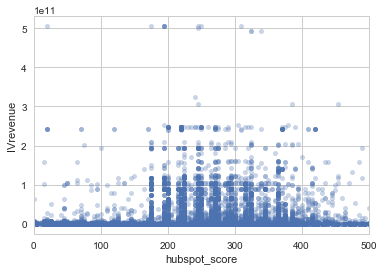

In [379]:
ds2.plot(kind='scatter', x='hubspot_score', y='IVrevenue', alpha=0.3, xlim=0);
plt.xlim(0,500)#look at revenue and predicted score

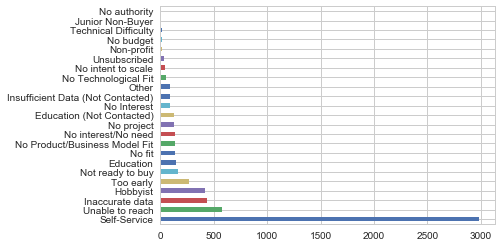

In [380]:
ds2.recycle_reason.value_counts().plot(kind='barh') 
#what are the most common reasons made people disqualified for sales conversation

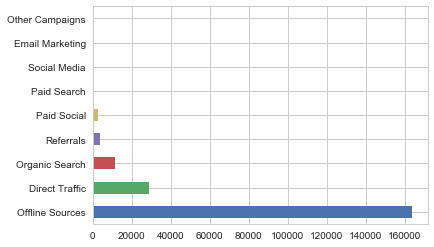

In [381]:
ds2.channel.value_counts().plot(kind='barh') 
#what are the most common reasons made people disqualified for sales conversation

In [416]:
ds2.isB2C.value_counts() #where are customers in the sales funnel 

Yes    29607
Name: isB2C, dtype: int64

In [417]:
ds2.corr() 
#check correlation, current predicted score (HubSpot Score) has no significant correlations with other variables

,total_no_device,hubspot_score,Emails Opened,Employees,IVrevenue
total_no_device,1.000000,0.011537,0.010872,-0.007034,-0.004821
hubspot_score,0.011537,1.000000,0.025866,0.078305,0.027683
Emails Opened,0.010872,0.025866,1.000000,-0.042248,-0.037484
Employees,-0.007034,0.078305,-0.042248,1.000000,0.675222
IVrevenue,-0.004821,0.027683,-0.037484,0.675222,1.000000


In [418]:
ds2['hubspot_score'].describe() #distribution of current quality score

count    212080.000000
mean         72.886529
std         130.496615
min       -1625.000000
25%          25.000000
50%          50.000000
75%         110.000000
max        1210.000000
Name: hubspot_score, dtype: float64

In [420]:
ds2['Industry'].value_counts().head(20)#which industries are customers in

Leisure, Sports and Recreation              8636
Education                                   7779
Internet Software & Services                4405
Schools and Education                       3349
Computer Software                           3131
Corporate Services                          3116
Hospitals and Healthcare                    1957
Media                                       1790
Consumer Product Manufacturing              1500
Consumer Services                           1338
Telecommunications                          1307
Consulting                                  1209
Pharmaceuticals and Biotechnology           1151
Industrial Manufacturing and Services       1115
Retail                                      1095
Construction and Building Materials         1088
Electronics                                  925
Technology Hardware, Storage & Periph...     849
Computer Hardware                            823
Chemicals                                    807
Name: Industry, dtyp

## Metrics for the project

- Total no. of device
- Hubspot Score
- Company Revenue
- Company Size
- Industry
- Status

In [382]:
#Create a new dataframe that only contains selected metrics.
ds = ds2.filter(['Email','total_no_device', 'hubspot_score', 'IVrevenue','create_date','Employees', 'Industry', 'Status'], axis=1)

In [383]:
ds.isnull().sum() #check null in each columns

Email                   0
total_no_device     61305
hubspot_score           0
IVrevenue          174698
create_date             0
Employees          159504
Industry           147757
Status               7666
dtype: int64

In [384]:
ds.total_no_device.fillna(0) #fill 0 to NaN in device count

Contact ID
1              0.0
2051           2.0
8451        1306.0
6151          28.0
8201           2.0
1801           1.0
10001       2703.0
3601           1.0
5651           5.0
7701           0.0
3351           3.0
7703           2.0
7705           1.0
1051           7.0
7201           0.0
2851           4.0
2601           0.0
6701         855.0
2351          91.0
8751           5.0
4401           1.0
4151           1.0
1851           2.0
8251           1.0
1601           1.0
3651           0.0
7751           2.0
9801           6.0
5451           6.0
1101           0.0
             ...  
50011951       0.0
50047651       0.0
50050851       0.0
50029601       0.0
50020001       0.0
50013601       0.0
50048551       0.0
50051751       0.0
50000551       0.0
50017701       0.0
50046501       0.0
50033051       0.0
50015002       0.0
50040601       0.0
50011801       0.0
50002201       0.0
50011551       0.0
50021651       0.0
50034451       0.0
49997201       0.0
50035351       0.0
5

In [385]:
ds.dropna(axis=0, how='any',inplace = True) #exclude all other rows that contain NaN

In [386]:
ds.isnull().sum() #check if there's remaining null values

Email              0
total_no_device    0
hubspot_score      0
IVrevenue          0
create_date        0
Employees          0
Industry           0
Status             0
dtype: int64

In [387]:
ds.shape #check size of the filtered dataframe

(24699, 8)

(-300, 800)

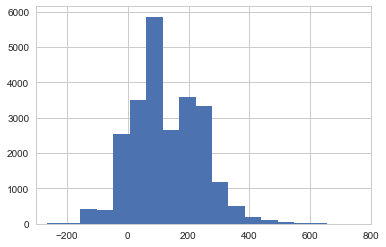

In [388]:
ds.hubspot_score.hist(bins=40) #distribution of existing predicted score
plt.xlim(-300,800)

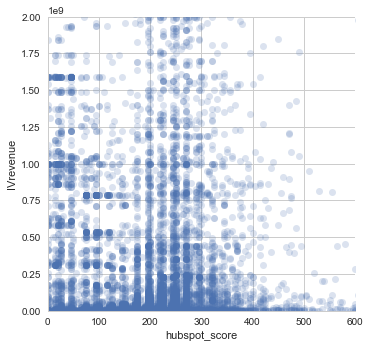

In [389]:
# scatter with regression line
g = sns.lmplot(x='hubspot_score', y='IVrevenue', data=ds, aspect=1, scatter_kws={'alpha':0.2});
g.set(xlim=(0,600))
g.set(ylim=(1,2000000000))

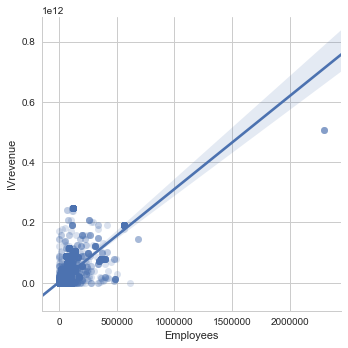

In [390]:
# scatter with regression line - Revenue and Employees
g = sns.lmplot(x='Employees', y='IVrevenue', data=ds, aspect=1, scatter_kws={'alpha':0.2});

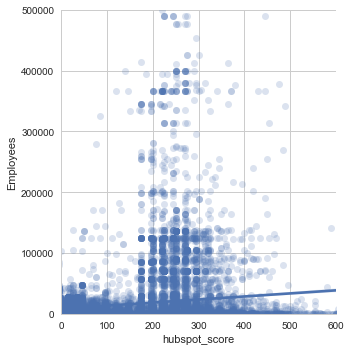

In [391]:
# scatter with regression line - predicted score vs Employees
g = sns.lmplot(x='hubspot_score', y='Employees', data=ds,aspect=1, scatter_kws={'alpha':0.2});
g.set(xlim=(0,600))
g.set(ylim=(0,500000))

In [392]:
ds.info() #check the statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24699 entries, 8201 to 49325101
Data columns (total 8 columns):
Email              24699 non-null object
total_no_device    24699 non-null float64
hubspot_score      24699 non-null int64
IVrevenue          24699 non-null float64
create_date        24699 non-null object
Employees          24699 non-null float64
Industry           24699 non-null object
Status             24699 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 1.7+ MB


In [393]:
#look at current distribution of stages
ds.Status.value_counts() 

Known                 22178
SAL                    1453
Recycled                687
Partner Lead            106
Unqualified              84
Current Account          75
MQL                      39
SQL                      38
Engaged                  18
Hold                     18
On deck                   2
01J360000075BnyEAE        1
Name: Status, dtype: int64

In [394]:
ds.head()
#get a sense of the values in the dataframe

,Email,total_no_device,hubspot_score,IVrevenue,create_date,Employees,Industry,Status
Contact ID,,,,,,,,
8201,profbayer@gmail.com,2.0,60,253000.0,1/27/17 8:16,6.0,"Leisure, Sports and Recreation",Known
1801,michael.b.kilgore.ug@dartmouth.edu,1.0,75,486000.0,1/18/17 11:06,3913.0,Education,Known
3601,binglersteven@gmail.com,1.0,70,253000.0,1/18/17 10:52,6.0,"Leisure, Sports and Recreation",Known
7705,zuendorf@uni-kassel.de,1.0,110,2063000.0,1/23/17 8:00,14.0,Schools and Education,Known
2851,ijsmallman@gmail.com,4.0,165,32700000.0,1/19/17 11:32,489.0,Electronics,Known


In [395]:
ds.sort_values(by='total_no_device', ascending=True).values[24000:24005] 
#check random device count

array([['rossterhaar@gmail.com', 5.0, 115, 253000.0, '1/23/17 9:32', 6.0,
        'Leisure, Sports and Recreation', 'Known'],
       ['brian@tangent.org', 5.0, 295, 758000000.0, '1/30/17 13:14',
        2600.0, 'Hospitals and Healthcare', 'Known'],
       ['jer.williams@gmail.com', 5.0, 250, 30200000.0, '1/23/17 10:13',
        4330.0, 'Retail', 'Known'],
       ['atennant@cisco.com', 5.0, 400, 48600000000.0, '1/22/17 21:39',
        86303.0, 'Wireless Telecommunication Services', 'Partner Lead'],
       ['apadgett01@gmail.com', 5.0, 430, 875000.0, '8/27/17 22:23',
        13.0, 'Leisure, Sports and Recreation', 'SAL']], dtype=object)

In [396]:
# Mean no of employees of each stage, grouped by stages.
ds.groupby(by='Status', axis=0).Employees.mean()

Status
01J360000075BnyEAE     1400.000000
Current Account       62707.760000
Engaged                8803.833333
Hold                  50399.222222
Known                 13101.928488
MQL                   18688.564103
On deck                 105.000000
Partner Lead          77884.830189
Recycled              20608.819505
SAL                   20475.913971
SQL                    9803.184211
Unqualified           12307.892857
Name: Employees, dtype: float64

In [397]:
ds.groupby('Status').mean()
#check each stage mean by no of device, predicted score, company revenue and size

,total_no_device,hubspot_score,IVrevenue,Employees
Status,,,,
01J360000075BnyEAE,1.000000,475.000000,4.500000e+08,1400.000000
Current Account,1.746667,267.800000,1.865622e+10,62707.760000
Engaged,24.166667,392.222222,9.321906e+09,8803.833333
Hold,3.222222,424.722222,3.954526e+10,50399.222222
Known,1.339931,112.628506,6.067145e+09,13101.928488
MQL,20.000000,344.230769,4.775504e+09,18688.564103
On deck,2.500000,272.500000,5.157000e+08,105.000000
Partner Lead,0.839623,262.594340,1.516709e+10,77884.830189
Recycled,4.989811,-71.644833,9.655913e+09,20608.819505


In [398]:
ds.corr()
#check correlations

,total_no_device,hubspot_score,IVrevenue,Employees
total_no_device,1.000000,0.030728,-0.005838,-0.006100
hubspot_score,0.030728,1.000000,0.177608,0.130465
IVrevenue,-0.005838,0.177608,1.000000,0.715359
Employees,-0.006100,0.130465,0.715359,1.000000


Several status are presenting same outcome, therefore this analysis will group those values into 3 groups.
- SAL: Qualified contact
- Unqualified: Unqualified contact
- Known: the rest

In [399]:
ds.replace('SQL','SAL',inplace=True)

In [400]:
ds.replace('MQL','SAL', inplace=True)

In [401]:
ds.replace('Current Account','SAL', inplace=True)

In [402]:
ds.replace('Recycled','Unqualified', inplace=True)

In [403]:
ds.replace('Partner Lead','SAL', inplace=True)

In [404]:
ds.replace('Engaged','SAL', inplace=True)

In [405]:
ds.replace('Hold','SAL', inplace=True)

In [406]:
ds.replace('On deck','SAL', inplace=True)

In [407]:
ds.replace('01J360000075BnyEAE','SAL', inplace=True)

In [408]:
ds.Status.value_counts()

Known          22178
SAL             1750
Unqualified      771
Name: Status, dtype: int64

In [413]:
# Map each status to a number
# Use 'SAL':2, 'known':1, 'Unqualified':0 and create a column called 'status_num'
ds['status_num'] = [2 if x == 'SAL' else 1 if x == 'Known' else 0 for x in ds.Status]

In [423]:
ds.status_num.value_counts() #count no. of contact in each status

1    22178
2     1750
0      771
Name: status_num, dtype: int64

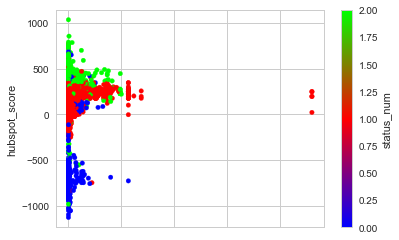

In [422]:
ds.plot(kind='scatter', x='Employees', y='hubspot_score', c='status_num', colormap='brg');

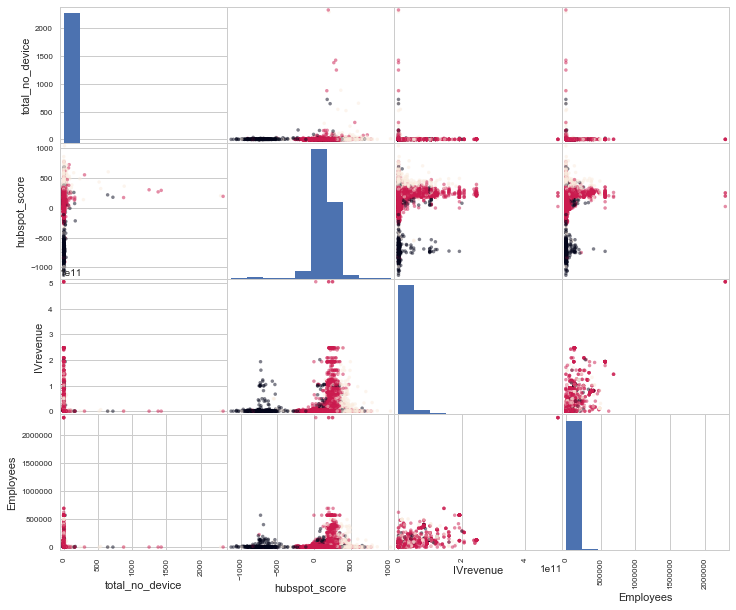

In [415]:
pd.plotting.scatter_matrix(ds.drop('status_num', axis=1), c=ds.status_num, figsize=(12, 10));

In [234]:
X = ds[['IVrevenue','hubspot_score','total_no_device']]
X.head()

,IVrevenue,hubspot_score,total_no_device
Contact ID,,,
8201,253000.0,60,2.0
1801,486000.0,75,1.0
3601,253000.0,70,1.0
7705,2063000.0,110,1.0
2851,32700000.0,165,4.0


In [424]:
y = ds.status_num
y.head()

Contact ID
8201    1
1801    1
3601    1
7705    1
2851    1
Name: status_num, dtype: int64

In [435]:
from sklearn.model_selection import train_test_split # Importing this from model_evaluation instead of cross_val

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25) # and creating a train and test set using TTS

In [436]:
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) # Set my neighboour to be 1
knn.fit(X_train, y_train) # Fit my train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Performance evaluation

In [440]:
knn.score(X_test, y_test) #check the accuracy when n=1

0.8775708502024292

In [438]:
knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

#Set n=5

0.8960323886639676

In [439]:
knn5 = KNeighborsClassifier(n_neighbors=4)

knn5.fit(X_train, y_train)
knn5.score(X_test, y_test)

# Set n=4 

0.897165991902834

In [442]:
#The probability of the most common outcome
print(22178/(22178+1750+771))

0.8979310903275436


## Impact of findings.

This improvement doesn't not make more efficient use of sales and marketing resources.

## Recommendations or next steps.
- The future analysis will need more data.
- The qualification process contains lots of human processing which might lead the data set less predictable.

## Summary
- Only a small fraction of the data set was used in this analysis due to high null volume in the majority of variables.
- Company size and revnue have positive correlation.
- Using KNN model when n= 4 has the highest accuracy score, and was still lower compares to the probability of the most common outcome.

In [ ]:
#Oversampling, Bootstrapping Data
df = pd.concat([X_train,y_train],axis=1)
df['status_num'] = df['status_num'].map(lambda x: (abs(x)!=1)*1)

In [ ]:
df[df['status_num']==1].shape

In [ ]:
df[df['status_num']==1].sample(2000,replace=True)